## Red Wine Quality Prediction Project:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.model_selection import cross_val_score,GridSearchCV 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Explolatery Data Analysis(EDA)

In [3]:
data.shape
#we got 1599 rows and 12 columns in this data set.

(1599, 12)

In [4]:
data.head() #checing 1st 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum()#checking for nulls
#there is no nulls in this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.dtypes#checking for datatypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Great none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

In [8]:
data.quality.value_counts()#checking for label value count 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Here label column seems imbalanced we will handle this later in the project

In [9]:
data.describe().T #checking the statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Observatons-
Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

1.There is a big gap between 75% and max values of residual sugar column

2.There is a big gap between 75% and max values of free sulfur dioxide column

3.There is a huge gap between 75% and max value of total sulfur dioxide column

All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [10]:
data.skew() # acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Here we see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

# Visualization

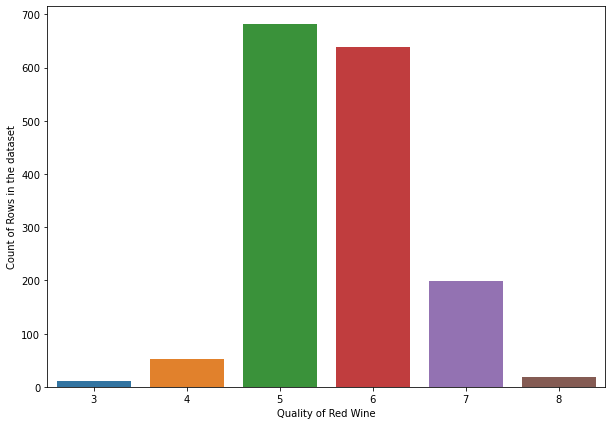

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = data)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

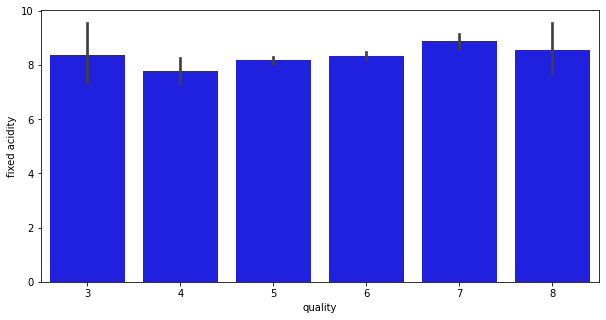

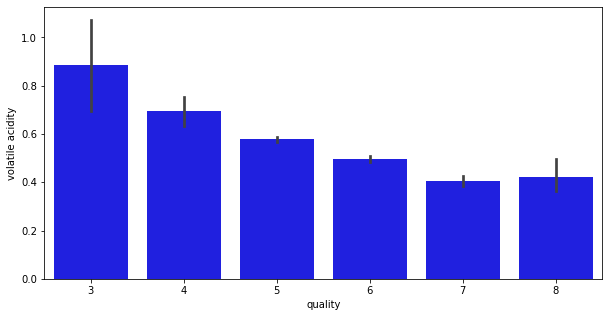

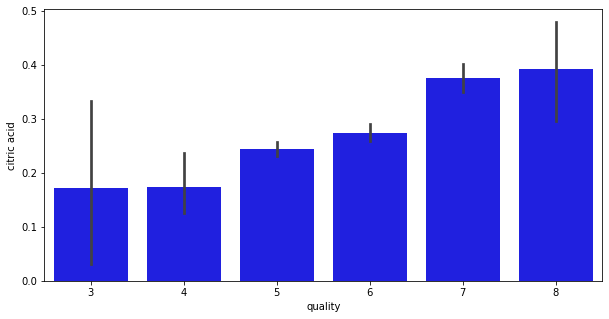

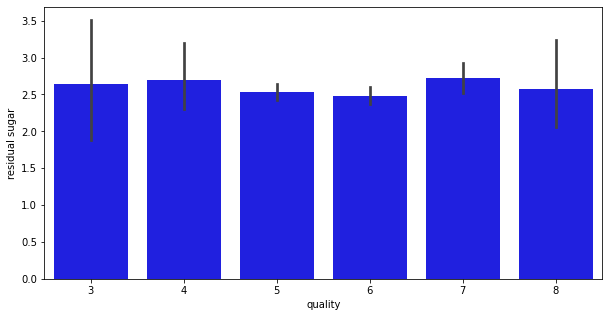

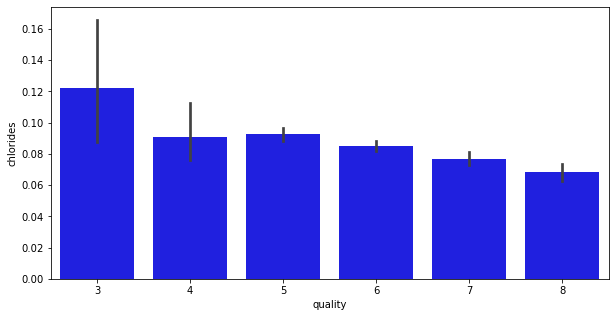

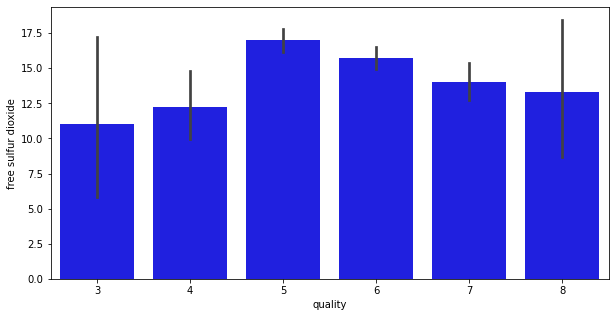

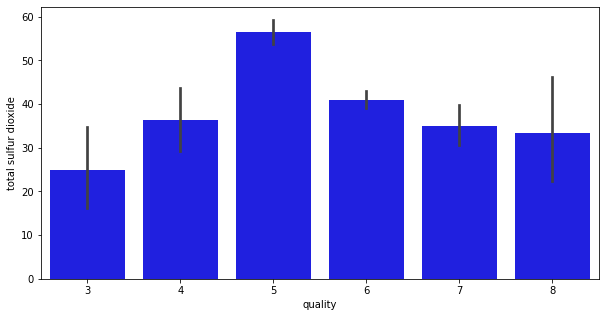

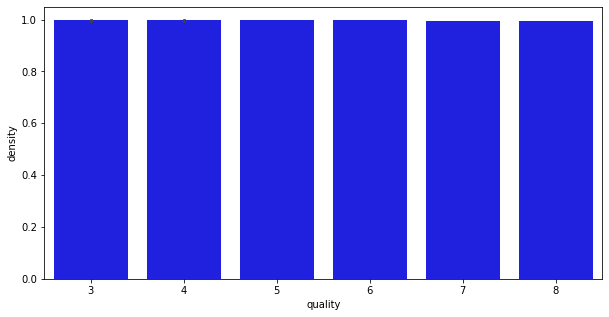

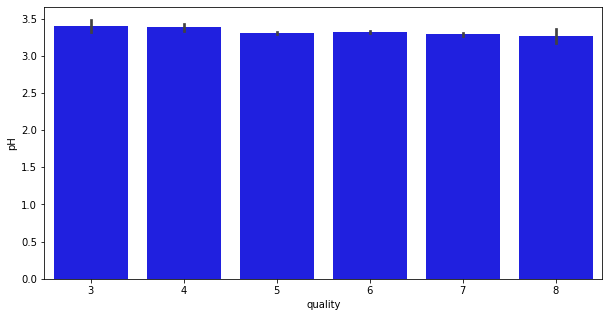

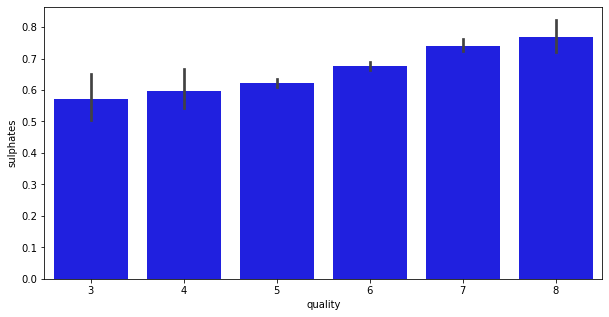

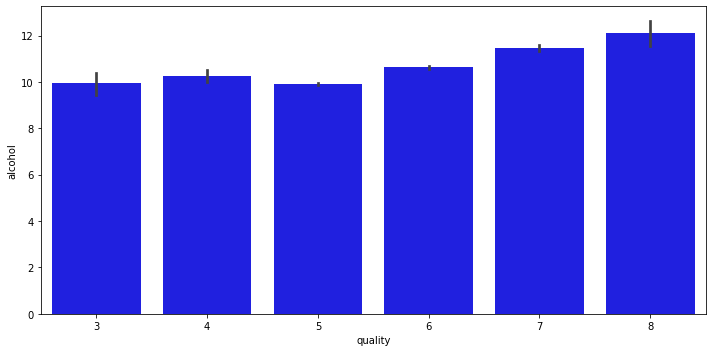

In [12]:
index=0
labels = data['quality']
features = data.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=data, color="blue")
plt.tight_layout()
plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are: 

01. fixed acidity vs quality - no fixed pattern 

02. volatile acidity vs quality - there is a decreasing trend 

03. citric acid vs quality - there is an increasing trend 

04. residual sugar vs quality - no fixed pattern

05. chlorides vs quality - there is a decreasing trend 

06. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 

07. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 

08. density vs quality - no pattern at all

09. pH vs quality - no pattern at all 

10. sulphates vs quality - there is an increasing trend 

11. alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

In [13]:
data.skew() # acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Here we see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

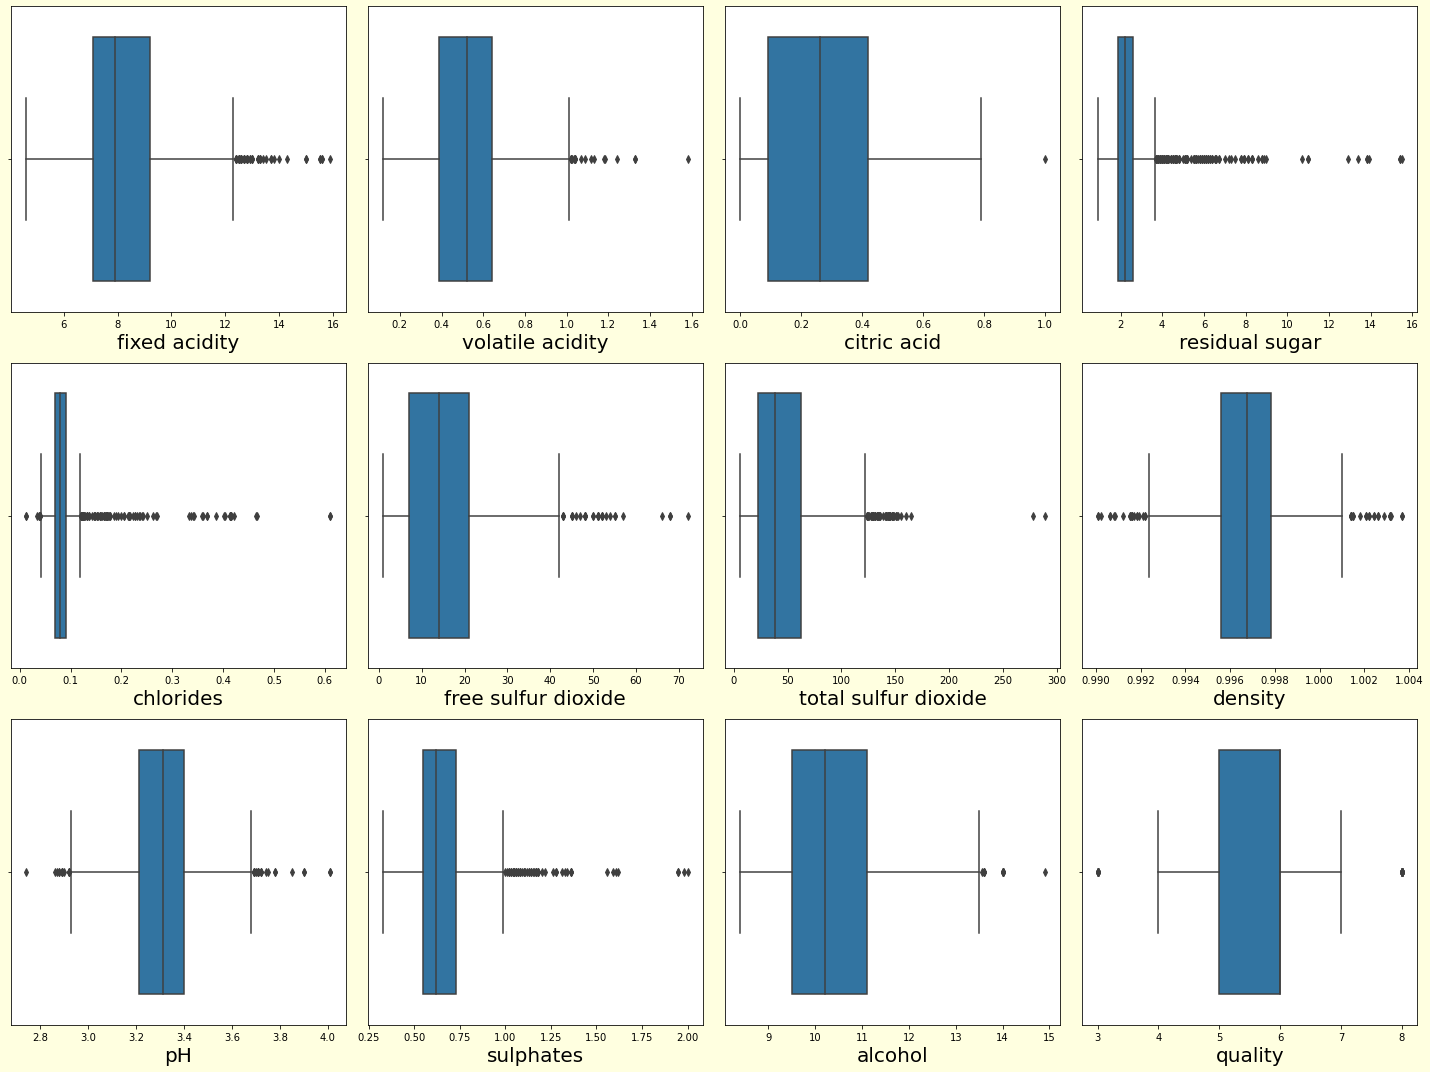

In [14]:
plt.figure(figsize=(20,15),facecolor='lightyellow')
plot_number=1

for column in data:
    if plot_number<=12: 
        ax=plt.subplot(3,4,plot_number)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset

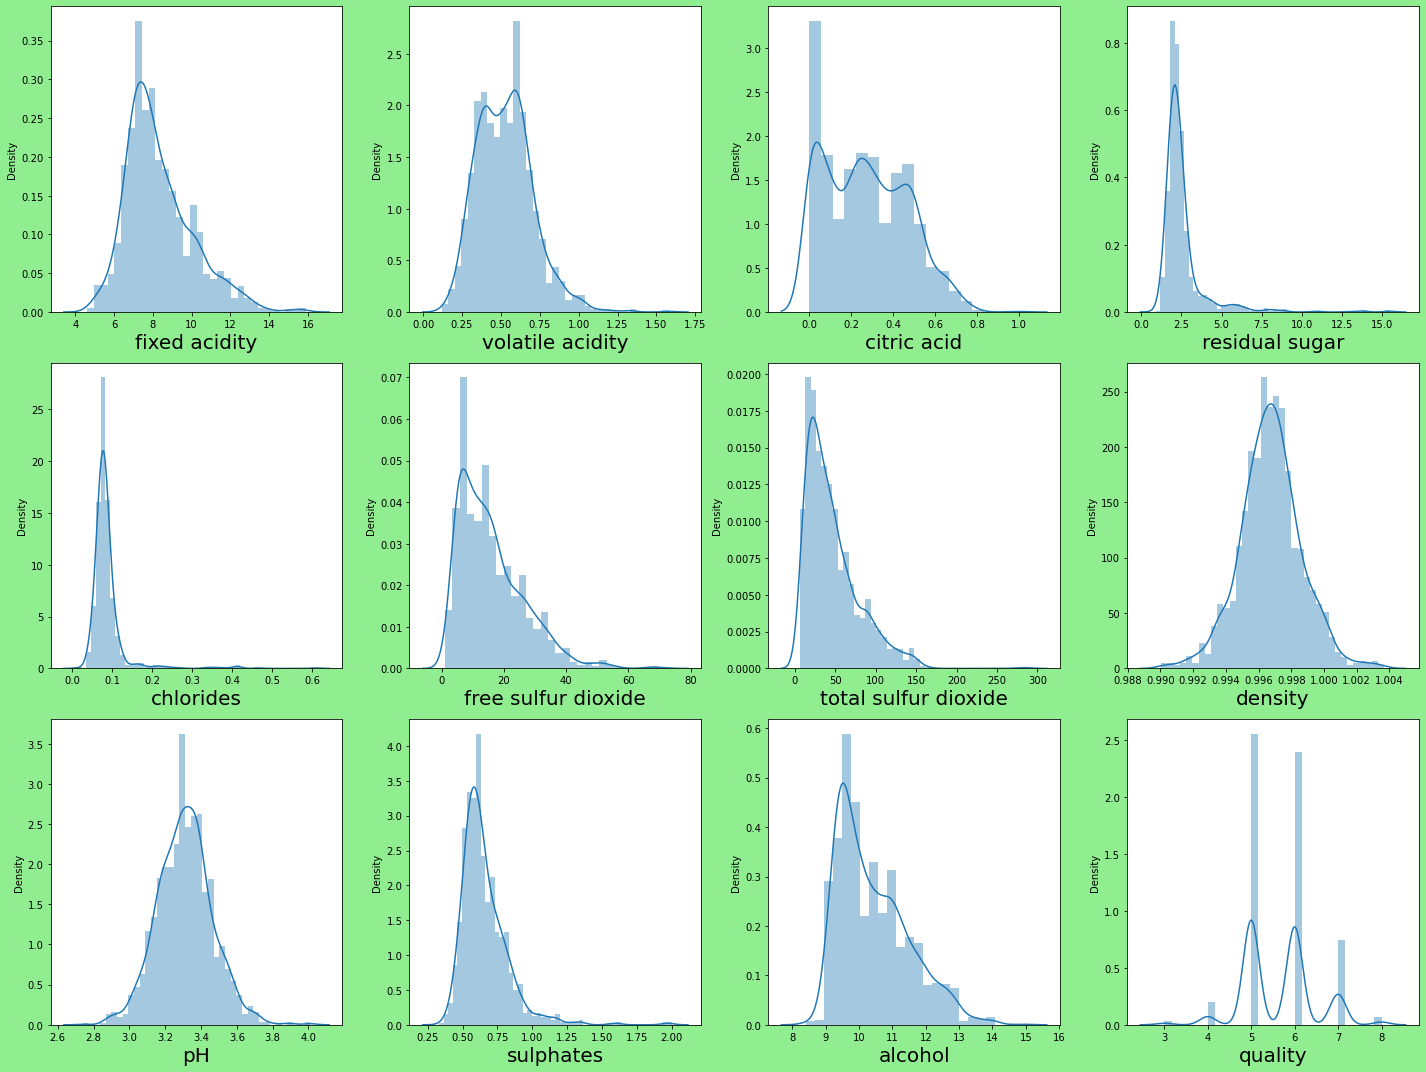

In [15]:
plt.figure(figsize=(20,15),facecolor='lightgreen')
plot_number=1

for column in data:
    if plot_number<=12: 
        ax=plt.subplot(3,4,plot_number)
        sns.distplot(data[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

### Correlation using a Heatmap

In [16]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


plotting the heatmap and check for correlation

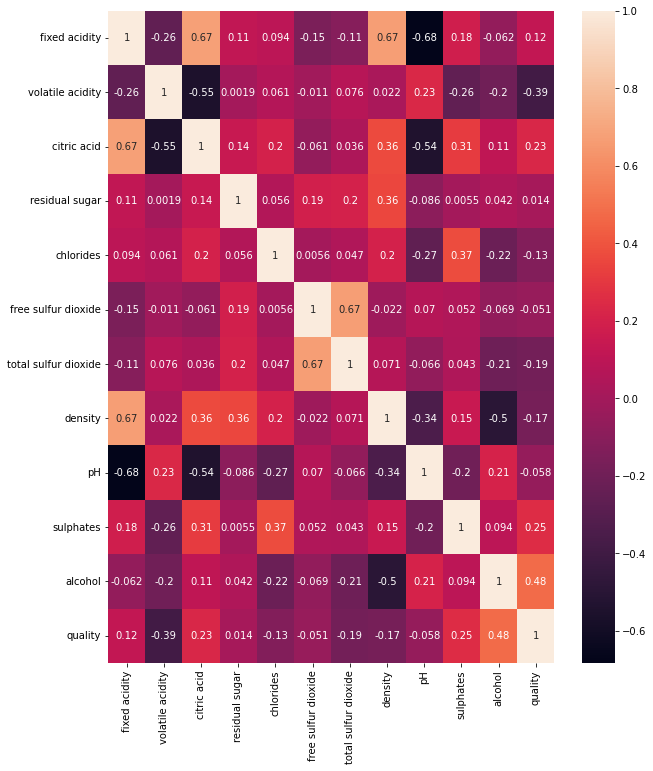

In [17]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.67 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.67 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.67which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

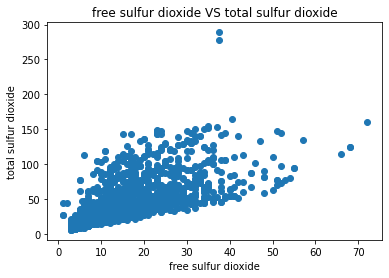

In [18]:
plt.scatter(x='free sulfur dioxide',y='total sulfur dioxide',data=data)
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.title('free sulfur dioxide VS total sulfur dioxide')
plt.show()

I can see a positive trend between these 2 feature as long total sulfur dioxide increasing so is free sulfur dioxide' increasing.I feel that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore I am dropping the free option and keeping just the total option in our datasetsimilarly we can remove the other positive corelated fetaures but its a small datset so it won't be a good idea.

In [19]:
data=data.drop('free sulfur dioxide', axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


### Outlier removal

In [20]:
print("Before outlier removal Shape of dataset is",data.shape)

Before outlier removal Shape of dataset is (1599, 11)


In [21]:
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data=data[(z<3).all(axis=1)]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
print("After outlier removal Shape of dataset is",data.shape)

After outlier removal Shape of dataset is (1464, 11)


In [24]:
data_loss=(1599-1464)/1599*100
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
print("Data loss after outlier removal",data_loss)

Data loss after outlier removal 8.442776735459661


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outliers.

### Splitting the dataset into 2 variables namely 'x' and 'Y' for feature and label


In [25]:
x=data.drop('quality',axis=1)
Y=data.quality

### Taking care of class imbalance

In [26]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
# adding samples to make all the categorical quality values same
ove_smp=SMOTE()
x,Y=ove_smp.fit_resample(x,Y)


In [29]:
Y.value_counts()


5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

### Label Binarization

In [30]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [31]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.700247,0.358561,0.351092,1.982134,0.060824,37.039682,0.994682,3.185335,0.736774,11.389330
3116,6.335055,0.756448,0.063365,1.700704,0.051682,73.633026,0.992991,3.526588,0.793271,12.833177
3117,7.852216,0.355652,0.336525,1.834786,0.073826,24.434823,0.994582,3.208693,0.710436,11.260857
3118,10.851302,0.590087,0.627431,4.808828,0.084619,19.575254,0.998270,3.222301,0.691151,13.169899


In [53]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.681211  ,  1.02558158, -1.52906808, ...,  1.47538557,
        -0.80779919, -1.25358722],
       [-0.43236919,  2.02705337, -1.52906808, ..., -0.72684727,
         0.10217158, -0.89004175],
       [-0.43236919,  1.35940551, -1.32343529, ..., -0.30060866,
        -0.12532111, -0.89004175],
       ...,
       [-0.39988539, -0.89027974,  0.200947  , ..., -0.66509425,
         0.33296863,  0.43767778],
       [ 1.46585964,  0.41405405,  1.69644281, ..., -0.56842138,
         0.18672688,  2.17273667],
       [-0.01074567, -0.28678284,  0.3754787 , ..., -0.86422482,
         0.2214844 ,  1.2735679 ]])

In [34]:
#for best random state
lr=LogisticRegression()


for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1)):
        print("At random_stat",i,"the model performed very well")
        print("At random_stat",i)
        print("Trainning Score",accuracy_score(y_train,pred_train)*100)
        print("Testing Score",accuracy_score(y_test,pred_test)*100,'\n\n')

At random_stat 13 the model performed very well
At random_stat 13
Trainning Score 88.62179487179486
Testing Score 88.62179487179486 


At random_stat 45 the model performed very well
At random_stat 45
Trainning Score 88.30128205128204
Testing Score 88.30128205128204 


At random_stat 49 the model performed very well
At random_stat 49
Trainning Score 88.46153846153845
Testing Score 88.46153846153845 


At random_stat 53 the model performed very well
At random_stat 53
Trainning Score 88.26121794871796
Testing Score 88.30128205128204 


At random_stat 66 the model performed very well
At random_stat 66
Trainning Score 88.54166666666666
Testing Score 88.46153846153845 




In [36]:
#choosing 25 as best random_state
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=13)

In [66]:
#writing one function for different models accuracy
def metric_score(model, X, Y):
    # Training the model
    model.fit(x_train, y_train)
    
    #train pred
    train_pred=model.predict(x_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    
    # Accuracy Score for test
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score for testing:", acc_score)
    
    # Accuracy Score for train
    acc_score1 = (accuracy_score(y_train, train_pred))*100
    print("Accuracy Score for train:", acc_score1)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score  for any machine learning model that calls for this function.

### Logistic Regression

In [68]:
model=LogisticRegression()
metric_score(model, X, Y)

Accuracy Score for testing: 88.9423076923077
Accuracy Score for train: 88.50160256410257

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       368
           1       0.87      0.86      0.86       256

    accuracy                           0.89       624
   macro avg       0.89      0.88      0.89       624
weighted avg       0.89      0.89      0.89       624

Cross Validation Score: 87.21153846153847

Accuracy Score - Cross Validation Score is 1.7307692307692264


Created the Logistic Regression Model and checked for it's evaluation metrics.



### SVC

In [69]:
model=SVC()
metric_score(model, X, Y)


Accuracy Score for testing: 91.82692307692307
Accuracy Score for train: 93.30929487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       368
           1       0.90      0.90      0.90       256

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.96794871794872

Accuracy Score - Cross Validation Score is 1.8589743589743506


### Decision Tree

In [70]:
model=DecisionTreeClassifier()
metric_score(model, X, Y)

Accuracy Score for testing: 91.34615384615384
Accuracy Score for train: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       368
           1       0.88      0.91      0.90       256

    accuracy                           0.91       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 89.58333333333334

Accuracy Score - Cross Validation Score is 1.7628205128204968


### Random Forest Classifier

In [71]:
model=RandomForestClassifier()
metric_score(model, X, Y)

Accuracy Score for testing: 94.55128205128204
Accuracy Score for train: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       368
           1       0.91      0.96      0.94       256

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.33974358974358

Accuracy Score - Cross Validation Score is 2.211538461538467


### KNeighborsClassifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
metric_score(model, X, Y)


Accuracy Score for testing: 92.62820512820514
Accuracy Score for train: 93.6298076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       368
           1       0.87      0.96      0.91       256

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 88.75

Accuracy Score - Cross Validation Score is 3.8782051282051384


In [73]:
import xgboost as xgb

In [74]:
model=xgb.XGBClassifier(verbosity=0)
metric_score(model, X, Y)

Accuracy Score for testing: 95.99358974358975
Accuracy Score for train: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       368
           1       0.93      0.98      0.95       256

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 91.89102564102564

Accuracy Score - Cross Validation Score is 4.102564102564116


### Plotting roc_auc_curve to find the best model 

In [77]:
lr=LogisticRegression()
svc=SVC()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [79]:
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
dt.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [83]:
lr.score(x_test,y_test)
svc.score(x_test,y_test)
rfc.score(x_test,y_test)
dt.score(x_test,y_test)
knn.score(x_test,y_test)
print("All model's score captured")

All model's score captured


In [84]:
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.score(x_train,y_train)
print("All models are trained")

All models are trained


In [85]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

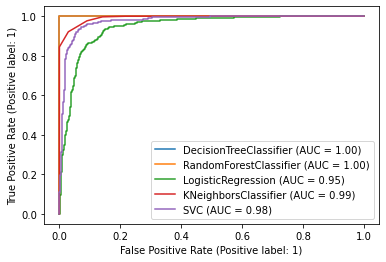

In [86]:
#plotting curves on training data
disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

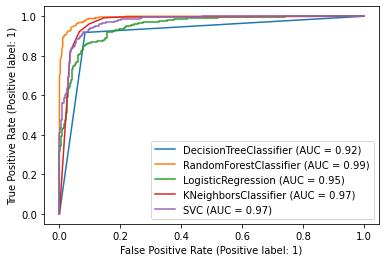

In [87]:
#plotting curve on test data
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')
plt.show()

Decision tree and Random forest are giving 100% for training data. There may be chance of overfitting. So third highest is Logistic regression and it's same for both training and test data So choosing Logistic REgression modl as my final model


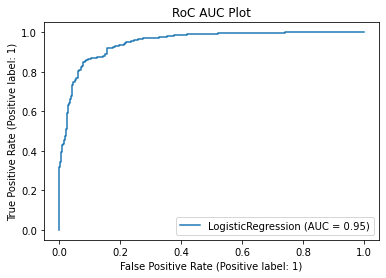

In [89]:

plot_roc_curve(lr,x_test,y_test)
plt.title('RoC AUC Plot')
plt.show()

### Saving the model 

In [90]:
import pickle
import joblib

In [91]:
filename='Red_wine_quality.pkl'
pickle.dump(lr,open(filename,'wb'))